In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')

In [3]:
ds.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
ds.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
ds.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9350    False
9351    False
9352    False
9353    False
9354    False
Length: 9355, dtype: bool

In [7]:
ds.shape

(9355, 12)

In [8]:
ds.describe().astype(str)

,work_year,salary,salary_in_usd
count,9355.0,9355.0,9355.0
mean,2022.7604489577766,149927.98129342598,150299.4955638696
std,0.5194697748192405,63608.83538733171,63177.37202443525
min,2020.0,14000.0,15000.0
25%,2023.0,105200.0,105700.0
50%,2023.0,143860.0,143000.0
75%,2023.0,187000.0,186723.0
max,2023.0,450000.0,450000.0


In [9]:
ds.describe().astype(int)

,work_year,salary,salary_in_usd
count,9355,9355,9355
mean,2022,149927,150299
std,0,63608,63177
min,2020,14000,15000
25%,2023,105200,105700
50%,2023,143860,143000
75%,2023,187000,186723
max,2023,450000,450000


In [10]:
ds.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [11]:
ds['company_location'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

In [12]:
Top_3_Country = ds['company_location'].value_counts(normalize = True).head(3)
Top_3_Country

company_location
United States     0.869268
United Kingdom    0.047996
Canada            0.024158
Name: proportion, dtype: float64

In [13]:
Top_3_Country.sum()

0.9414216996258686

## 94% of jobs are in "United States" , "United Kingdom" and "Canada" where 86.92% of jobs only in United States ##

In [14]:
df = pd.DataFrame(index = ds['work_year'].unique())

for year in df.index:
        total = 0
        for country in Top_3_Country.index:
            df.loc[year,country] = ds[(ds['company_location'] == country) & (ds['work_year'] == year)].shape[0]
            total = total + df.loc[year,country]
        df.loc[year, "Others"] = ds[ds['work_year'] ==  year].shape[0]-total
df

,United States,United Kingdom,Canada,Others
2023,6663.0,340.0,174.0,276.0
2022,1339.0,90.0,38.0,167.0
2020,33.0,4.0,3.0,31.0
2021,97.0,15.0,11.0,74.0


<Axes: >

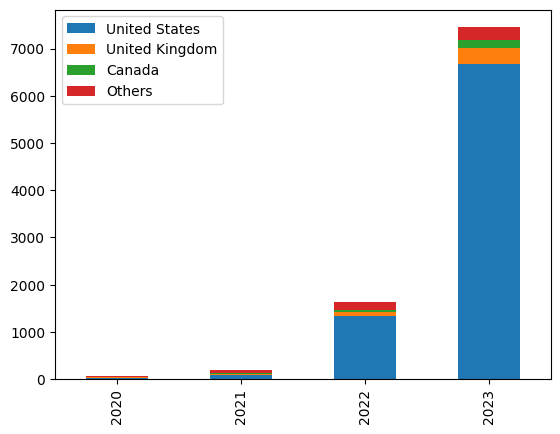

In [15]:
df.sort_index().plot(kind = 'bar',stacked = True)

In [16]:
ds['experience_level'].value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [17]:
exp_levels = ds['experience_level'].value_counts().sort_values(ascending = False).index
exp_levels_color = sns.color_palette(n_colors = len(exp_levels)).as_hex()

In [18]:
exp_levels

Index(['Senior', 'Mid-level', 'Entry-level', 'Executive'], dtype='object', name='experience_level')

In [19]:
exp_levels_color

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

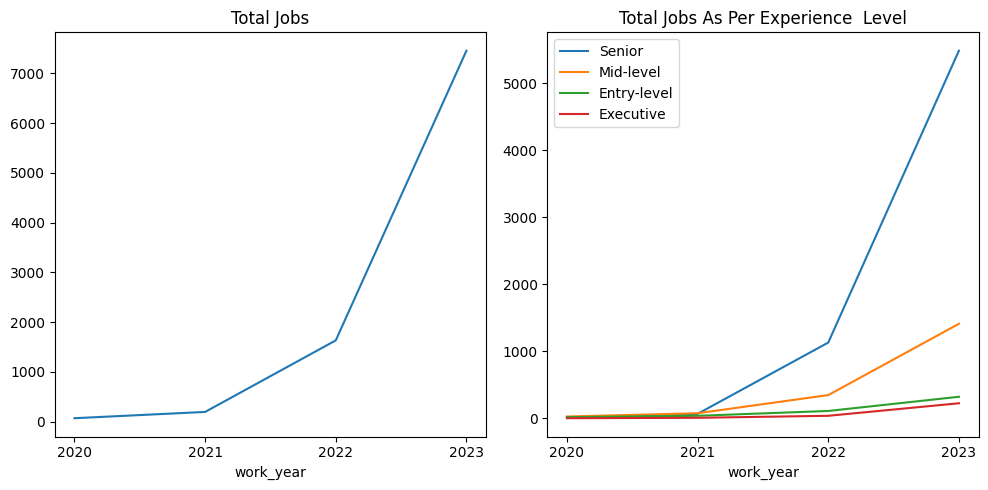

In [20]:
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
ds['work_year'].value_counts().sort_index().plot( kind = 'line')

plt.xticks(ds['work_year'].unique())
plt.title(label = 'Total Jobs')

plt.subplot(1,2,2)
for exp,color in zip(exp_levels,exp_levels_color):
    ds[ds['experience_level']==exp]['work_year'].value_counts().sort_index().plot(kind = 'line', label = exp, color = color)

    
plt.xticks(ds['work_year'].unique())
plt.legend()
plt.title(label = 'Total Jobs As Per Experience  Level')

plt.tight_layout()
plt.show()

<Axes: xlabel='work_year'>

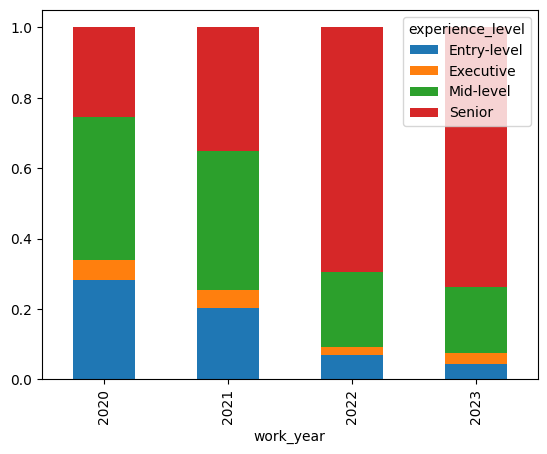

In [21]:
ds.groupby('work_year')['experience_level'].value_counts(normalize=True).sort_values(ascending=True).unstack('experience_level').plot(kind = 'bar', stacked=True)

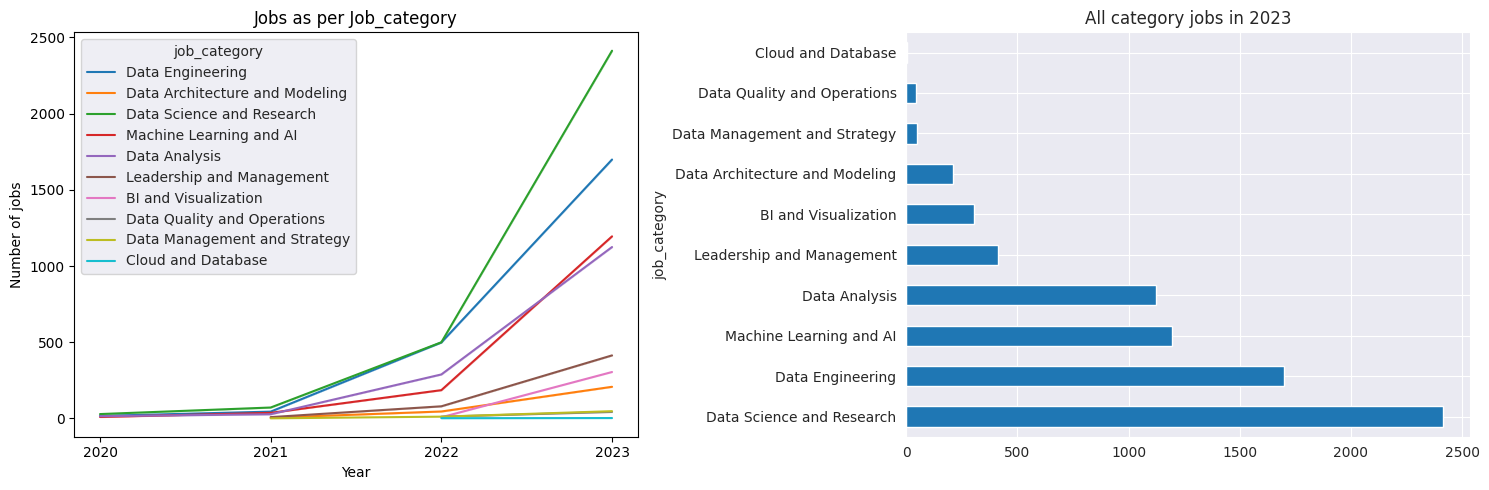

In [22]:
ds['1'] = 1
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.set_style('darkgrid')
ax = sns.lineplot(data = ds, x = 'work_year', y = '1', hue = 'job_category' , estimator = 'sum')

ax.set_title('Jobs as per Job_category')
ax.set_xlabel('Year')
ax.set_ylabel('Number of jobs')
plt.xticks(ds['work_year'].unique())

plt.subplot(1,2,2)
ax2 = ds[ds['work_year']==2023]['job_category'].value_counts().plot(kind='barh')
ax2.set_title('All category jobs in 2023')
plt.tight_layout()
plt.show()

In [23]:
Top_4_Category = ds[ds['work_year']==2023]['job_category'].value_counts().head(4)

In [24]:
def Top4(ds):
    if ds in Top_4_Category.index:
        return ds
    else:
        return 'Others'
    

In [25]:
ds['category_new'] = ds['job_category'].apply(Top4)
ds['category_new'].value_counts(normalize = True)

category_new
Data Science and Research    0.322181
Data Engineering             0.241582
Data Analysis                0.155746
Machine Learning and AI      0.152646
Others                       0.127846
Name: proportion, dtype: float64

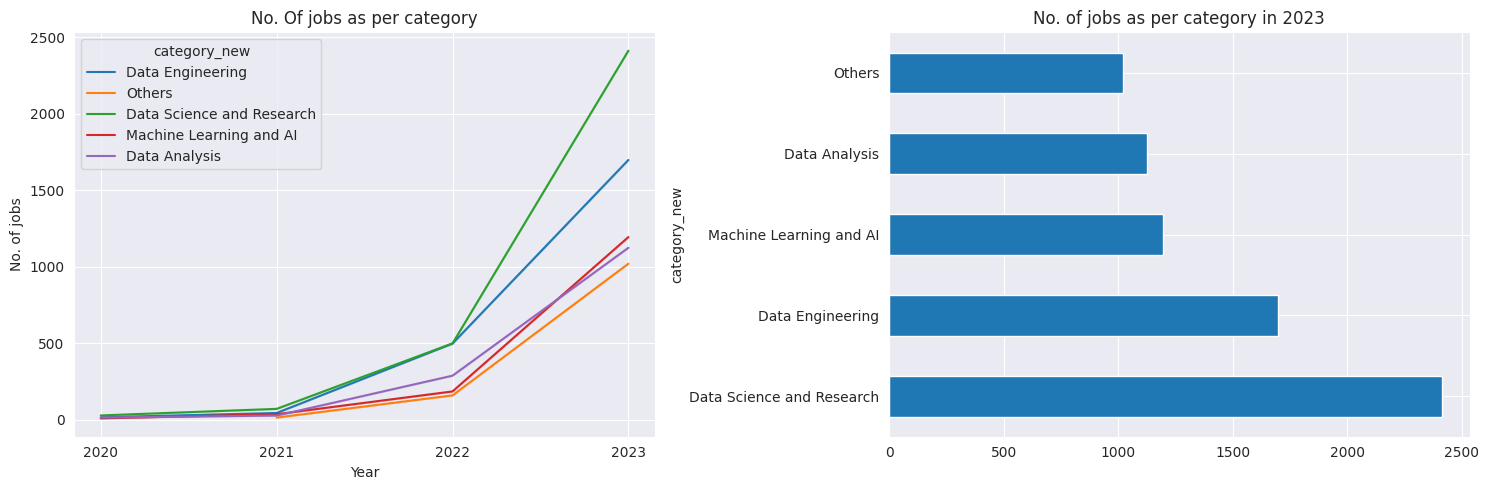

In [26]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.set_style('darkgrid')
ax = sns.lineplot(data = ds , x = 'work_year' , y = '1', hue = 'category_new', estimator = 'sum')

ax.set_title('No. Of jobs as per category')
ax.set_xlabel('Year')
ax.set_ylabel('No. of jobs')
plt.xticks(ds['work_year'].unique())

plt.subplot(1,2,2)
ax2 = ds[ds['work_year']==2023]['category_new'].value_counts().plot(kind = 'barh')
ax2.set_title('No. of jobs as per category in 2023')

plt.tight_layout()
plt.show()


## all above we have seen according to the Jobs category in years
## now we will now visualize the graphs per salary and experience level

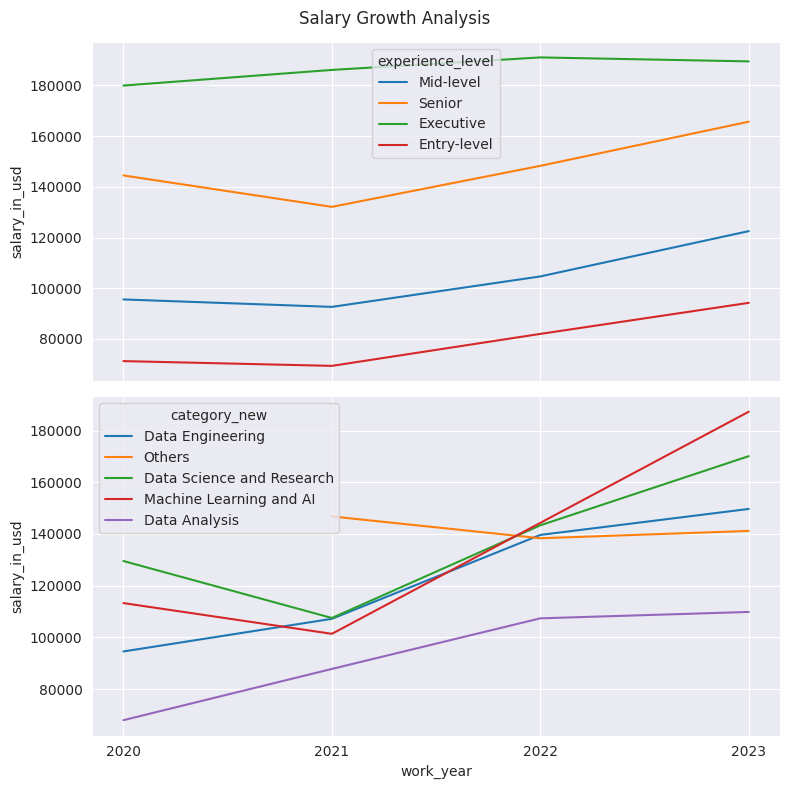

In [27]:
fig, axs = plt.subplots(2,1,figsize = (8,8), sharex = True)

fig.suptitle('Salary Growth Analysis')

sns.set_style('darkgrid')
sns.lineplot(ax = axs[0], data = ds, x = 'work_year', y = 'salary_in_usd',hue = 'experience_level', estimator = 'mean',errorbar = None)

sns.lineplot( ax = axs[1], data = ds, x = 'work_year', y = 'salary_in_usd', hue = 'category_new', estimator = 'mean', errorbar = None)

plt.xticks(ds['work_year'].unique())

plt.tight_layout()
plt.show()

<Axes: xlabel='salary_in_usd', ylabel='Count'>

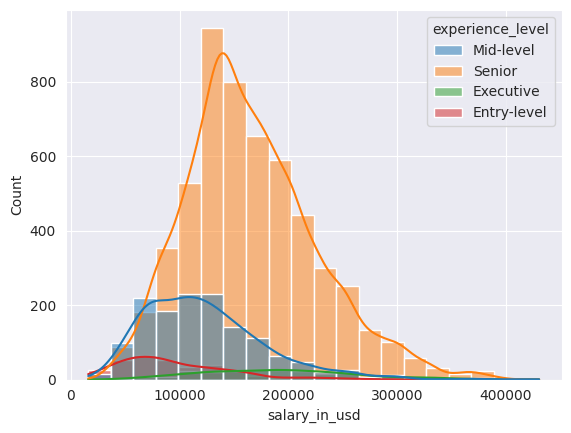

In [28]:
sns.histplot(data = ds[ds['work_year']== 2023], x = 'salary_in_usd', hue = 'experience_level',kde = True, bins = 20)


## now we will analyse the top 5 countries in 2023

In [29]:
Top_5_countries = ds[ds['work_year']==2023]['company_location'].value_counts(normalize = True).head(5)
Top_5_countries

company_location
United States     0.894002
United Kingdom    0.045619
Canada            0.023346
Spain             0.008721
Germany           0.003891
Name: proportion, dtype: float64

In [30]:
boxplot_df = ds[(ds['work_year'] == 2023) & (ds['company_location'].isin(Top_5_countries.index))]
boxplot_df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,1,category_new
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,1,Data Engineering
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,1,Others
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,1,Others
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,1,Data Science and Research
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,1,Data Science and Research
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,2023,Machine Learning Engineer,Machine Learning and AI,USD,134500,134500,United States,Senior,Full-time,In-person,United States,L,1,Machine Learning and AI
7493,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Mid-level,Full-time,In-person,United States,M,1,Data Science and Research
7494,2023,Data Scientist,Data Science and Research,USD,90000,90000,United States,Mid-level,Full-time,In-person,United States,M,1,Data Science and Research
7495,2023,Data Engineer,Data Engineering,USD,160000,160000,United States,Entry-level,Full-time,In-person,United States,M,1,Data Engineering


In [31]:
median = boxplot_df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending = False).index
median

Index(['United States', 'Canada', 'Germany', 'United Kingdom', 'Spain'], dtype='object', name='company_location')

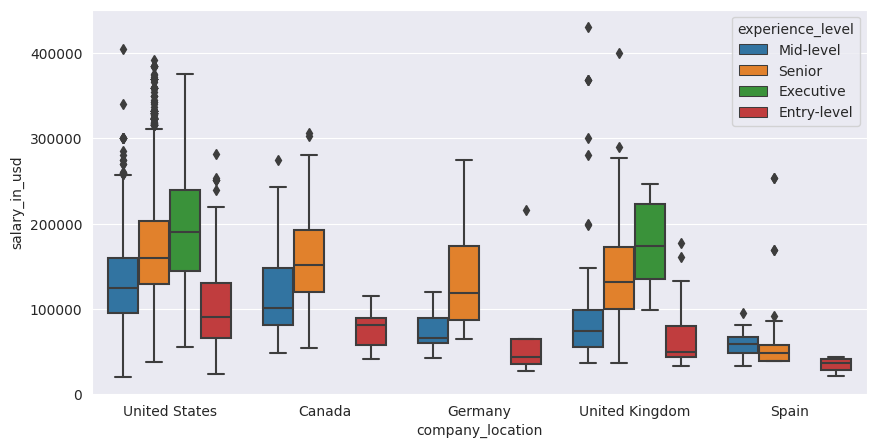

In [32]:
plt.figure(figsize=(10,5))

sns.boxplot(data = boxplot_df,
            x ='company_location',
            y = 'salary_in_usd',
            hue = 'experience_level',
           order = median)

plt.show()

In [33]:
ds['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [34]:
job_level = ['Entry-level','Mid-level','Senior','Executive']

In [35]:
top_sal_usa = boxplot_df[boxplot_df['company_location'] == 'United States']

In [36]:
mean_pay = top_sal_usa.groupby(['job_category','experience_level'])['salary_in_usd'].mean().unstack('experience_level')
mean_pay = mean_pay[job_level].sort_values(by = 'Senior',ascending = False)
mean_pay_thousand = mean_pay/1000
order_plot = mean_pay_thousand.index

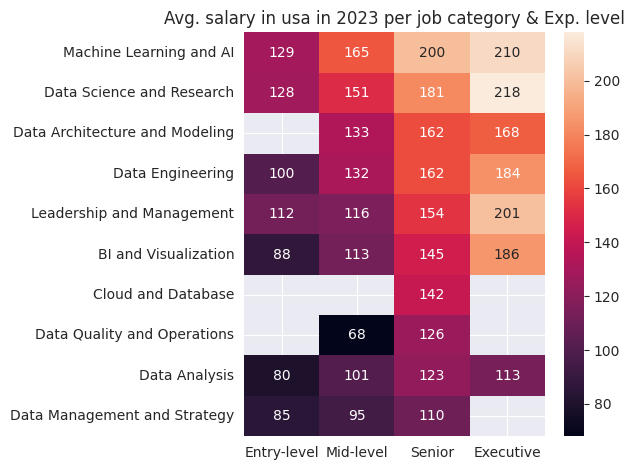

In [37]:
ax = sns.heatmap(data = mean_pay_thousand,annot = True, fmt = '.0f')


ax.set_title('Avg. salary in usa in 2023 per job category & Exp. level')
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

In [38]:
ds['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [39]:
ds['work_setting'].unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

In [40]:
ds['work_setting'].value_counts()

work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64

In [41]:
Remote_Person_Ratio = top_sal_usa.groupby(['job_category','experience_level','work_setting'])['salary_in_usd'].mean()
Remote_Person_Ratio = Remote_Person_Ratio.unstack('work_setting').drop('Hybrid', axis = 1)
Remote_Person_Ratio['Ratio'] = Remote_Person_Ratio['In-person'] / Remote_Person_Ratio['Remote']
Remote_Person_Ratio = Remote_Person_Ratio.drop(['In-person','Remote'], axis = 1)
Remote_Person_Ratio = Remote_Person_Ratio.unstack('experience_level')
Remote_Person_Ratio = Remote_Person_Ratio.droplevel(0,axis = 1)
Remote_Person_Ratio = Remote_Person_Ratio[job_level]
Remote_Person_Ratio = Remote_Person_Ratio.reindex(order_plot)

In [42]:
Remote_Person_Ratio

experience_level,Entry-level,Mid-level,Senior,Executive
job_category,,,,
Machine Learning and AI,1.659821,1.236823,1.006249,1.305908
Data Science and Research,1.223402,1.086364,1.041228,1.052787
Data Architecture and Modeling,NaN,0.732038,0.829092,NaN
Data Engineering,1.403188,1.065008,1.016653,0.776192
Leadership and Management,0.631235,0.983887,0.946350,0.708598
BI and Visualization,NaN,1.025262,1.096772,NaN
Cloud and Database,NaN,NaN,NaN,NaN
Data Quality and Operations,NaN,1.263810,1.082881,NaN
Data Analysis,1.088166,1.193421,1.008867,0.996324


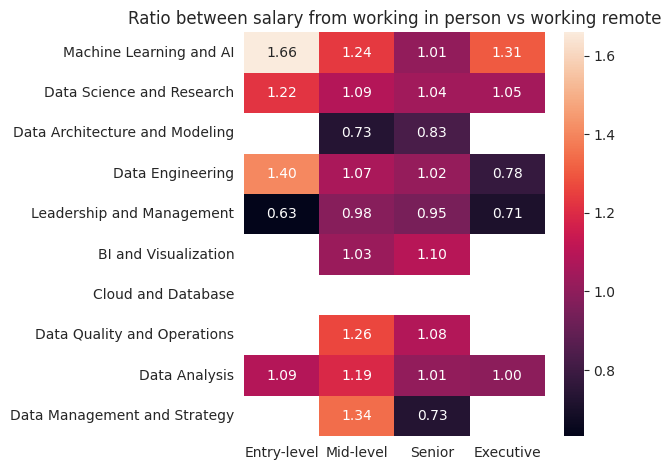

In [43]:

## Graph1 - Heatmap
sns.set_style('white')
ax = sns.heatmap(
    data =Remote_Person_Ratio,
    annot= True,
    fmt = '.2f',
    square=False
    )
ax.set_title('Ratio between salary from working in person vs working remote')
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

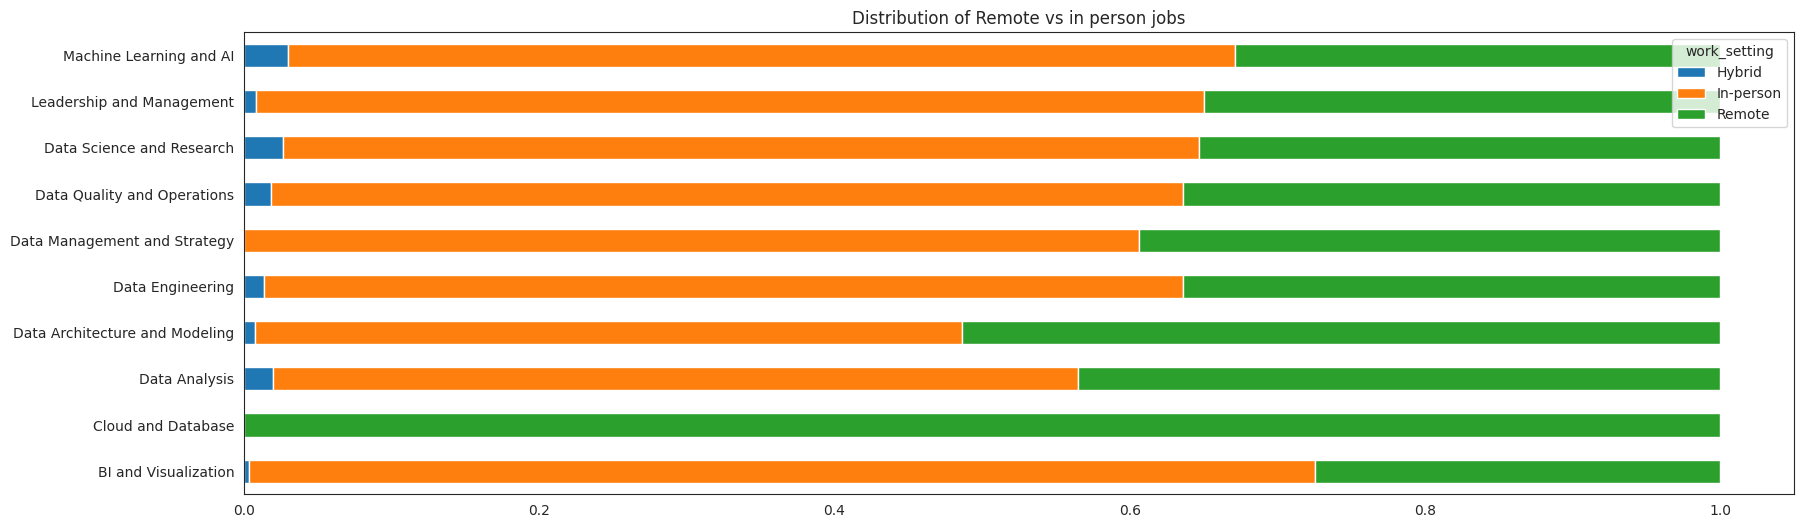

In [44]:
fig, ax = plt.subplots(figsize=(20, 6))
ds.groupby('job_category')['work_setting'].value_counts(normalize=True).unstack('work_setting').plot(kind = 'barh', stacked =True, ax=ax)

ax.set_title('Distribution of Remote vs in person jobs')
ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout
plt.show()

# CONCLUSION

1. Data analysis or data related jobs are most demanding and growth year by year.
2. More current jobs offering for Senior level professional.
3. 94% of jobs are in "United States" , "United Kingdom" and "Canada" where 86.92% of jobs only in United States
4. In data related jobs have approx 40% their workforce working remetely.
5. Most jobs related fields in 2023

>     Job Title                      Total jobs (in %)
     Data Science & Research         32.21%
     Data Engineering                24.15%
     Data Analysis                   15.57%
     Machine Learning and AI         15.26%
     Others                          12.78%